In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
#from mpl_toolkits.basemap import Basemap

from wordcloud import WordCloud
#import squarify
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 
import gensim 
from gensim import corpora

import json
import pandas as pd
import numpy as np
import scipy as sp
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
from scipy.misc import imread

import nltk
import spacy
import re
import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.manifold import TSNE

%matplotlib inline

### 1. Gather Data - Gym-specific Reviews

In [7]:
reviews = pd.read_csv('/Users/hector/Documents/Hernandez_Metis/Project5/yelp-dataset/yelp_review.csv')

In [8]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [9]:
business = pd.read_csv('/Users/hector/Documents/Hernandez_Metis/Project5/yelp-dataset/yelp_business.csv')
business_hour = pd.read_csv('/Users/hector/Documents/Hernandez_Metis/Project5/yelp-dataset/yelp_business_hours.csv')
checkin = pd.read_csv('/Users/hector/Documents/Hernandez_Metis/Project5/yelp-dataset/yelp_checkin.csv')
tips = pd.read_csv('/Users/hector/Documents/Hernandez_Metis/Project5/yelp-dataset/yelp_tip.csv')

In [10]:
business

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing


In [11]:
#business['name'].str.contains("gym")
df = business[business['categories'].str.contains("Gym","Fitness")]

In [12]:
df

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
23,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,16,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...
56,ykJM7EuGziATZ5u2qIT08g,"""My Fitness World""",South End,"""1225 S Church St, Ste B""",Charlotte,NC,28203,35.220211,-80.855785,5.0,4,1,Active Life;Fitness & Instruction;Gyms
151,v3tBN6s8BhotnjA7GncQnQ,"""Curves""",Yonge and Eglinton,"""36 Eglinton Ave W, 2nd Floor""",Toronto,ON,M4R 1A1,43.706534,-79.399988,3.5,3,0,Health & Medical;Active Life;Weight Loss Cente...
201,Muk-jU2W2x1D__h0pCXhbw,"""GoodLife Fitness""",Liberty Village,"""85 Hanna Ave, Ste 200""",Toronto,ON,M6K 3S3,43.640060,-79.419813,3.5,33,1,Active Life;Sports Clubs;Gyms;Fitness & Instru...
213,WghcqSAGCzKOhprLblYWVA,"""Get Results Personal Training""",Westside,"""7980 W Sahara Ave""",Las Vegas,NV,89117,36.144848,-115.264999,5.0,25,1,Active Life;Boot Camps;Trainers;Fitness & Inst...
297,V75NLjJ8YokBD-lM2p_5Rw,"""Angry Monkey MMA""",Sud-Ouest,"""3700 Street Patrick, Suit 111C""",Montréal,QC,H4E 1A2,45.470541,-73.580427,5.0,3,1,Martial Arts;Fitness & Instruction;Boxing;Gyms...
314,HCIr-4BvlO-SvEPMka9xpQ,"""Oasis Gymnastics & Sports Center""",NaN,"""8643 W Kelton Ln, Ste 110""",Peoria,AZ,85382,33.634175,-112.246006,3.5,7,1,Gymnastics;Dance Schools;Performing Arts;Arts ...
368,nvuMlUxjxJF5GPr6De6UlQ,"""Diamondback Gymnastics""",NaN,"""1250 S Clearview Ave, Ste 104""",Mesa,AZ,85209,33.391538,-111.677750,4.0,5,1,Active Life;Gymnastics
396,bLRpRq2Y7j76JHdDzoIfVQ,"""GoodLife Fitness""",Downtown Core,"""137 Yonge St""",Toronto,ON,M5C 1W6,43.651097,-79.378556,3.5,31,1,Trainers;Active Life;Health & Medical;Fitness ...
407,oFqSBajk338oJ1KNG4vCjA,"""Toronto Kick Boxing & Muay Thai Academy""",Mount Pleasant and Davisville,"""1992 Yonge Street""",Toronto,ON,M4S 1Z7,43.700264,-79.397013,4.0,8,1,Muay Thai;Kickboxing;Trainers;Gyms;Martial Art...


In [13]:
reviews

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0


#### Create a new dataframe containing only reviews for gyms 

In [14]:
df2 = pd.merge(df,reviews,on='business_id')

In [15]:
df2

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,uPuul6ugCVaTWTpdS46gow,X-VOe5bzT9EJu_L_Bt0nLQ,2,2015-08-10,I decided to try out this location when I bega...,0,0,0
1,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,zah90g3wykTFhqbL86l6IA,xDWGoKMTZu_UYbeWpfcn-w,2,2015-05-13,Where do I start. The only reason I'm giving i...,2,0,0
2,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,FOENQLpfrd8uu5GF_HD6RA,rrCvRjWHB0joS557FsWTog,3,2012-02-17,Fun facts\n\n-Court#3 for Squash has a closed ...,4,1,3
3,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,svF34xOcdShWvq3kyShtow,dmXpg_unok3cL3eW3RI0fA,1,2017-01-27,This is the worst Goodlife location I have eve...,4,0,0
4,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,6k-qsnGLmasfN9pt-4mUxQ,xLDLiq01SgHT38SS_uYO2g,1,2016-01-17,They refused to let my wheelchair bound mother...,0,0,0
5,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,7T3TsTfkf9rCCYaHRNgcuQ,WrhnuLDFmyu_bB-FLP_gsA,5,2016-03-16,Have used this gym for a few years. I have tr...,17,0,17
6,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,rKW-N6RRA6mswINm0nSoYg,sKZvwCtt2HMmZcDlx_IGRA,2,2014-09-11,Too small for the amount of members in attenda...,1,0,1
7,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,c-JmXlyu-XF042D7-5HQiQ,n81c57C6NyLrDkALxXZpaQ,1,2013-08-12,I was offered a family discount on my membersh...,5,0,0
8,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,unmmHuPZezHHRXxAuqL6xg,5iDjXeOz0mL4mEHsMVDR1Q,1,2016-07-15,"Very quickly, here is my experience from last ...",1,1,1
9,PMH4oUa-bWELKogdtkWewg,"""GoodLife Fitness""",NaN,"""100 City Centre Dr""",Mississauga,ON,L5B 2C9,43.592753,-79.643016,2.0,...,1,Fitness & Instruction;Sports Clubs;Gyms;Traine...,Qyaqb8s-eBKs5ieXFyii0g,yKrMdnTdSGxqqoD9c0OynQ,2,2015-11-25,Location is convenient for me\nWorking out at ...,2,0,0


### 2. EDA on Reviews, Hours, etc. 

#### Distribution of ratings (stars)

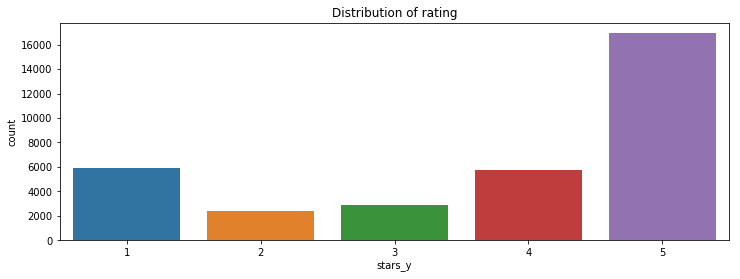

In [16]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df2['stars_y'])
plt.title('Distribution of rating');

131368

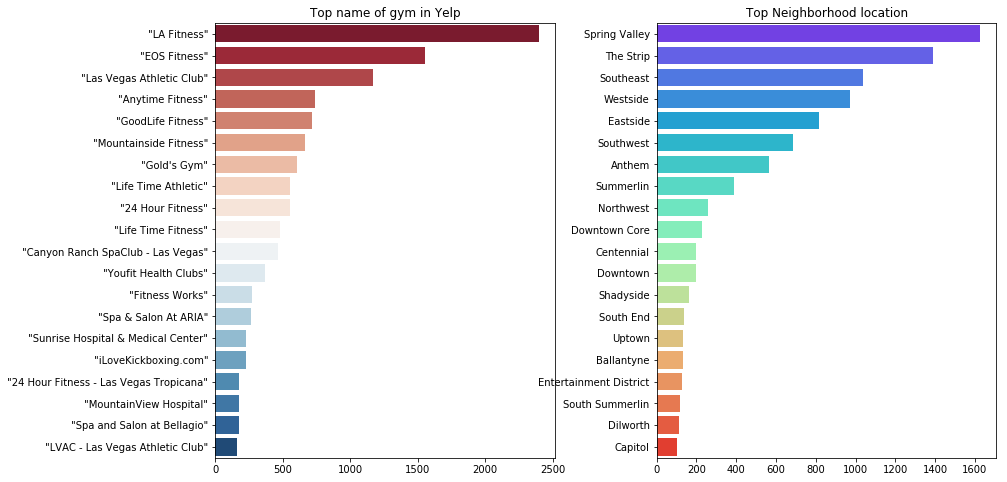

In [17]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = df2['name'].value_counts()[:20].to_frame()

sns.barplot(cnt['name'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top name of gym in Yelp')

cnt = df2['neighborhood'].value_counts()[:20].to_frame()

sns.barplot(cnt['neighborhood'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top Neighborhood location')
plt.subplots_adjust(wspace=0.3)
gc.collect()

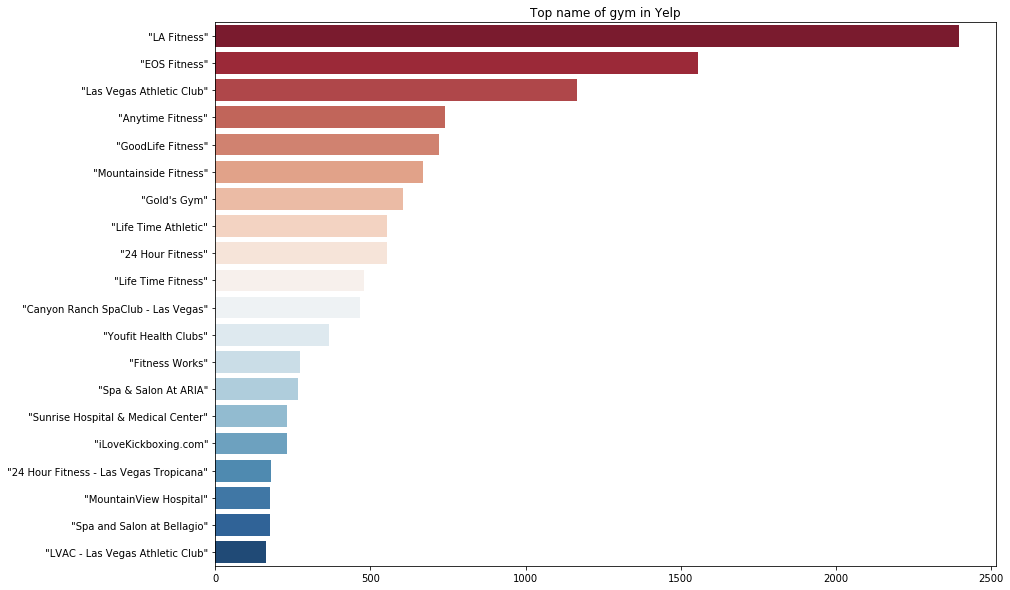

In [30]:
plt.figure(figsize = (14,10))
plt.tight_layout()

cnt = df2['name'].value_counts()[:20].to_frame()

sns.barplot(cnt['name'], cnt.index, palette = 'RdBu')
plt.xlabel('')
plt.title('Top name of gym in Yelp');
plt.savefig("Top_gyms.png", dpi=900);

#### Distribution of Gymns by City

Number of city listed 189


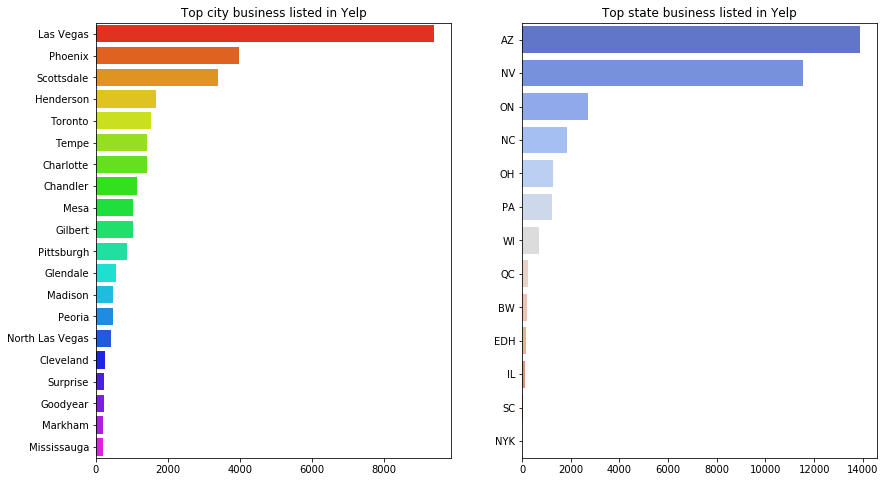

In [37]:
print('Number of city listed',df2['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = df2['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business listed in Yelp')

cnt = df2['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business listed in Yelp');

#### Review Count

Median review count 32.0


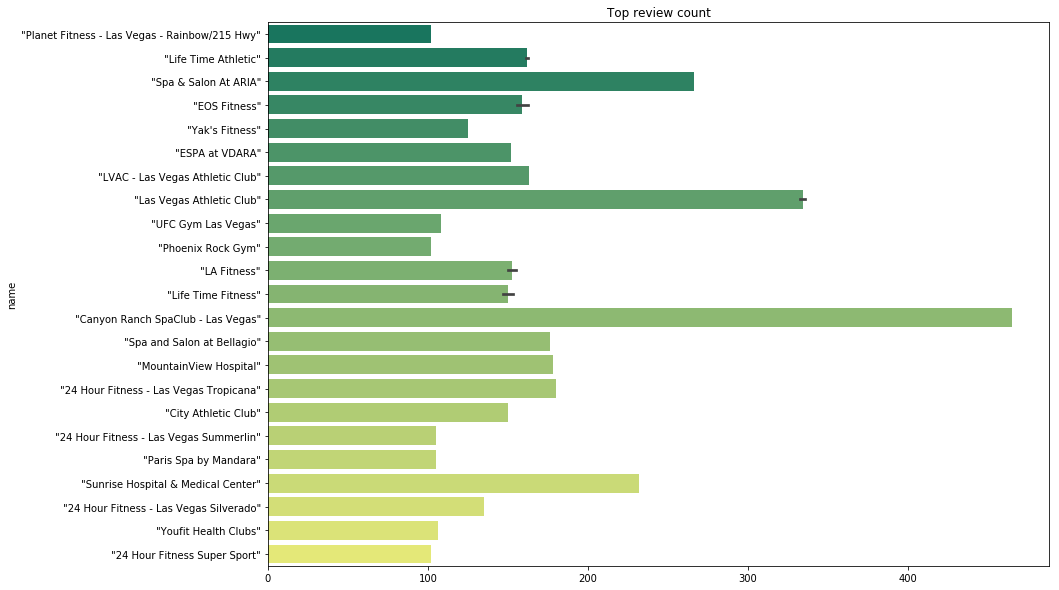

In [31]:
print('Median review count',df2['review_count'].median())
plt.figure(figsize = (14,10))
plt.tight_layout()
sns.barplot(df2[df2['review_count'] > 100]['review_count'],df2[df2['review_count'] >100]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count');
plt.savefig("Review_Counts.png", dpi=900);

In [32]:
df2['review_count'].mean()

64.07610843977699

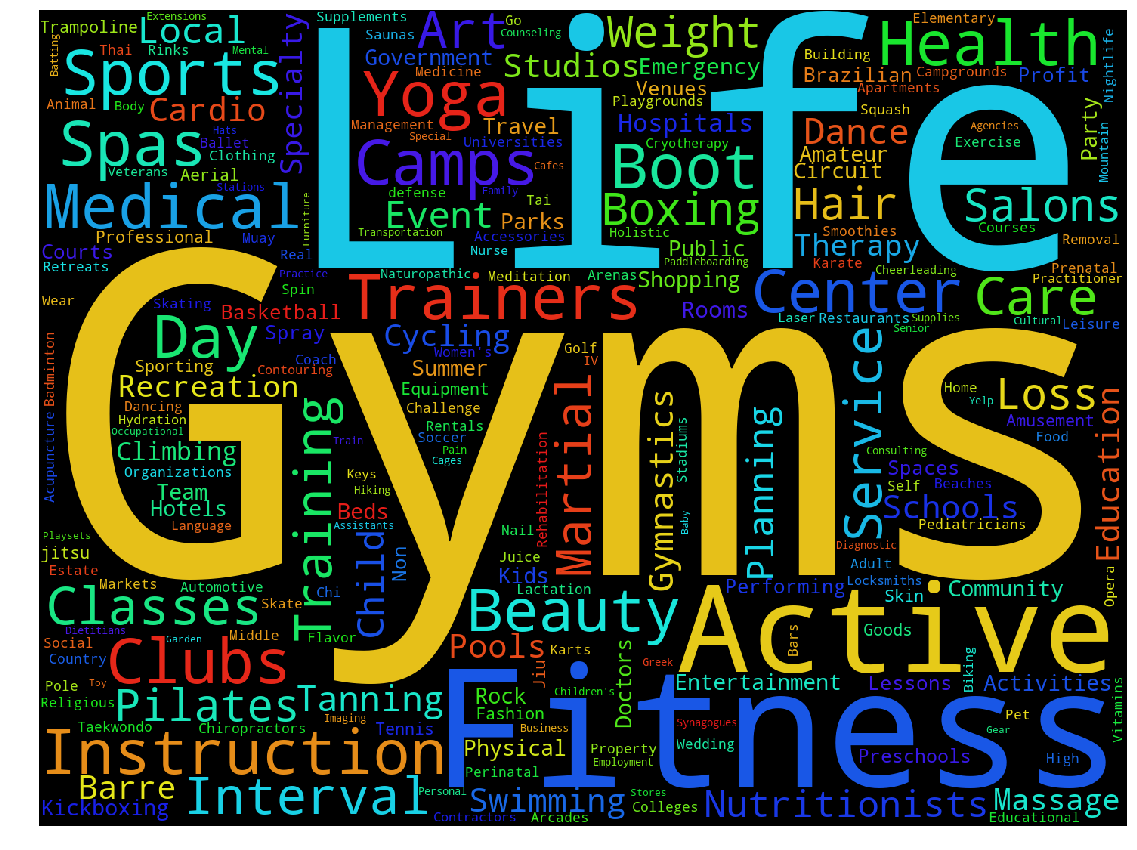

In [46]:
cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(df2['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

Maximum number of category 16
Median category of business 5.0


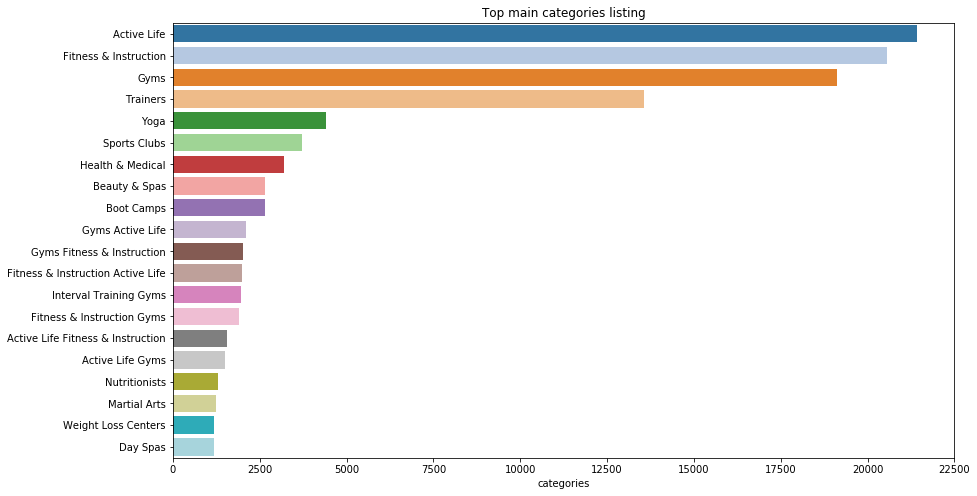

In [47]:
print('Maximum number of category',df2['categories'].str.split(';').str.len().max())
print('Median category of business',df2['categories'].str.split(';').str.len().median())
corpus = ' '.join(df2['categories'])

corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('Top main categories listing');

In [7]:
df_gyms = pd.merge(df2,checkin,on='business_id')

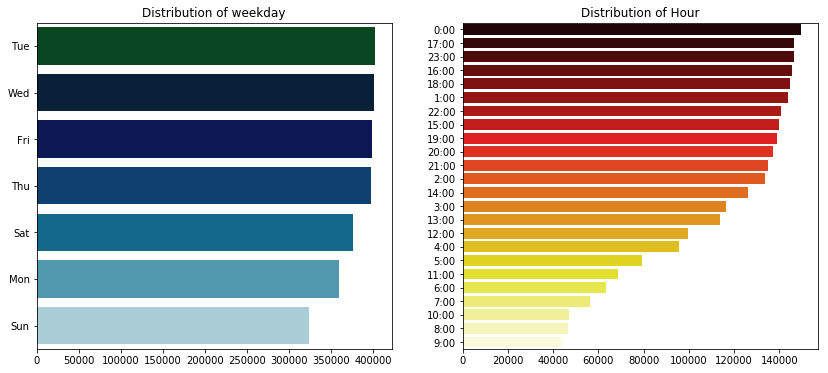

In [50]:
f,ax = plt.subplots(1,2, figsize = (14,6))
ax1,ax2, = ax.flatten()
cnt = df_gyms['weekday'].value_counts().to_frame()
sns.barplot(cnt['weekday'], cnt.index, palette = 'ocean', ax=ax1)
ax1.set_title('Distribution of weekday')
ax1.set_xlabel('')

cnt = df_gyms['hour'].value_counts().to_frame()
sns.barplot(cnt['hour'], cnt.index, palette = 'hot', ax=ax2)
ax2.set_title('Distribution of Hour')
ax2.set_xlabel('');

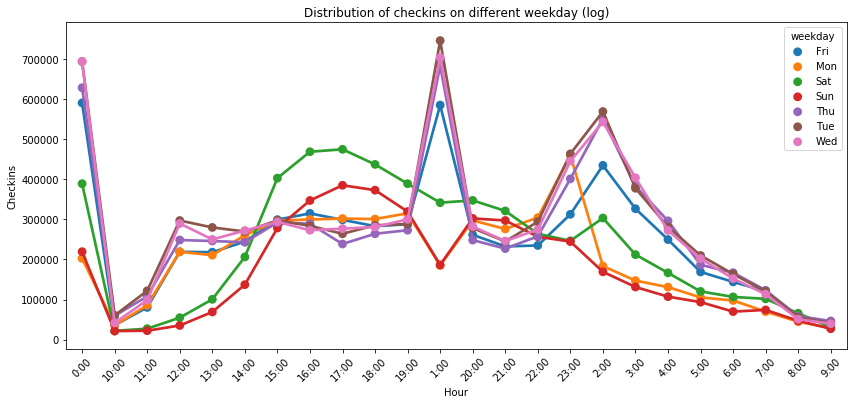

In [11]:
k = df_gyms.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.pointplot(y = k['checkins'],x = k['hour'],hue = k['weekday'],alpha=0.3)
plt.ylabel('Checkins')
plt.title('Distribution of checkins on different weekday (log)')
plt.xlabel('Hour')
plt.xticks(rotation=45);

In [2]:
df_gyms = pd.read_csv('gymns.csv')

/Users/hector/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Examining tips 

In [12]:
#df_tips = pd.merge(df, tips, on='business_id')

In [ ]:
df_tips = pd.read_csv('tips.csv')

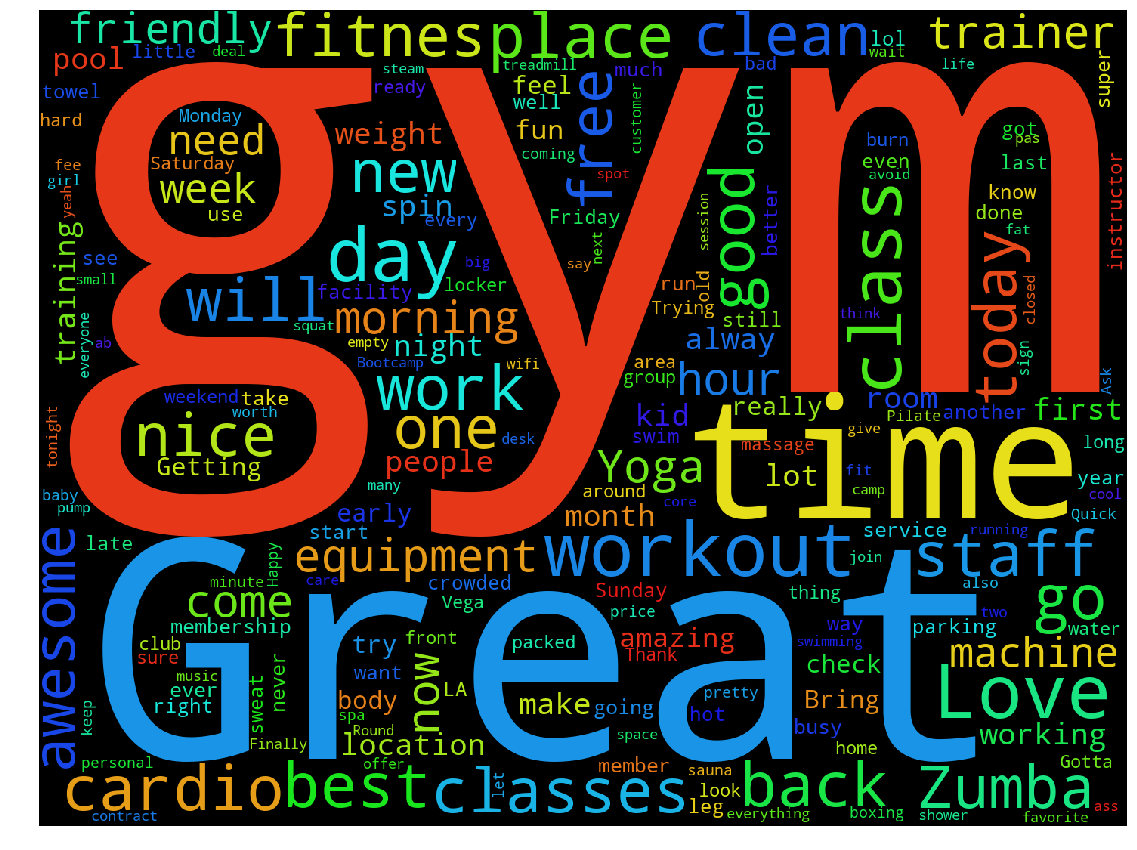

In [13]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(df_tips['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

In [17]:
df_tips['num_words'] = df_tips['text'].str.len()
df_tips['num_uniq_words'] = df_tips['text'].apply(lambda x: len(set(str(x).split())))
df_tips['num_chars'] = df_tips['text'].apply(lambda x: len(str(x)))
df_tips['num_stopwords'] = df_tips['text'].apply(lambda x: len([w for w in str(x).lower().split() 
                                                      if w in set(stopwords.words('english'))]))

In [14]:
#df_gyms.to_csv('gymns.csv')

In [15]:
#df_tips.to_csv('tips.csv')

/Users/hector/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Stop words')

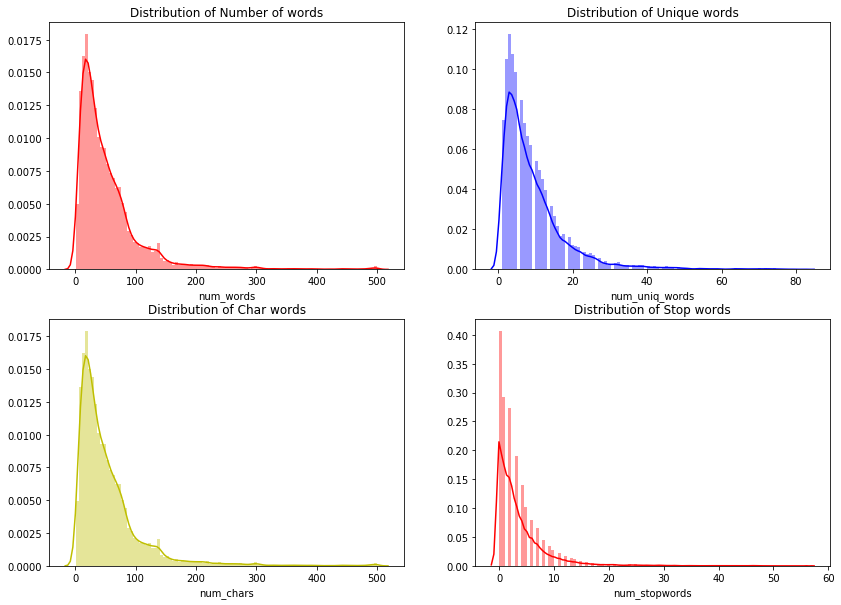

In [18]:
# Distribution of text feature
f, ax = plt.subplots(2,2, figsize = (14,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(df_tips['num_words'],bins=100,color='r', ax=ax1)
ax1.set_title('Distribution of Number of words')

sns.distplot(df_tips['num_uniq_words'],bins=100,color='b', ax=ax2)
ax2.set_title('Distribution of Unique words')

sns.distplot(df_tips['num_chars'],bins=100,color='y', ax=ax3)
ax3.set_title('Distribution of Char words')

sns.distplot(df_tips['num_stopwords'],bins=100,color='r', ax=ax4)
ax4.set_title('Distribution of Stop words')

In [20]:
df_tips['num_words'].mean()

54.62702530130098

In [21]:
# clean text
lemma = WordNetLemmatizer()

def clean_text(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc['text'][c].lower().split() if i not in set(stopwords.words('english'))])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus
doc_tips = clean_text(df_tips)

In [22]:
dictionary = corpora.Dictionary(doc_tips)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_tips]
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics= 3, id2word= dictionary, passes=20)

/Users/hector/anaconda/lib/python3.6/site-packages/gensim/matutils.py:995: RuntimeWarning: invalid value encountered in subtract
  result = psi(alpha) - psi(np.sum(alpha))


In [23]:
for topic in ldamodel.show_topics(num_topics=5, formatted=False, num_words= 5):
    print('Topic {}: words'.format(topic[0]))
    topic_word = [w for (w,val) in topic[1]]
    print(topic_word)

Topic 0: words
['luckily', 'strained', 'sensei', 'axe', 'tumblng']
Topic 1: words
['luckily', 'strained', 'sensei', 'axe', 'tumblng']
Topic 2: words
['luckily', 'strained', 'sensei', 'axe', 'tumblng']


#### Review Wordcloud

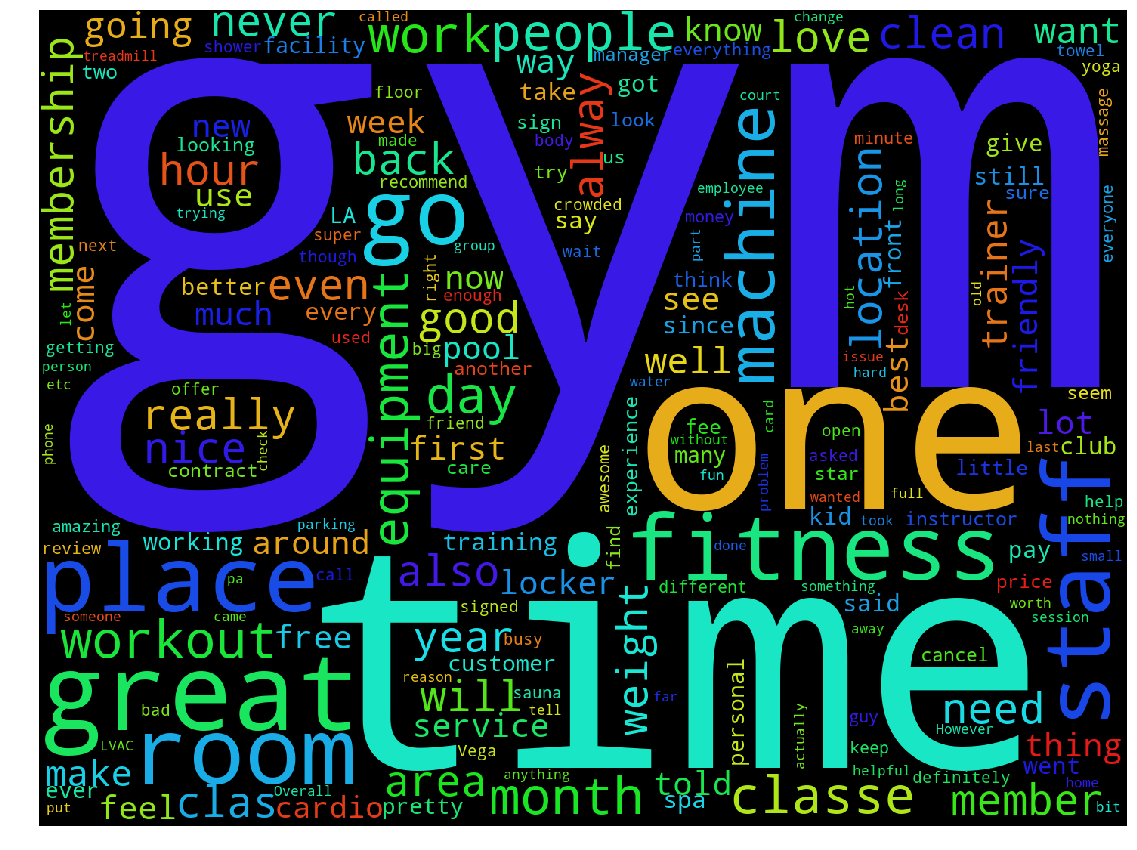

In [3]:
# Word cloud
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(df_gyms['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

In [35]:
df2['text']

0        I decided to try out this location when I bega...
1        Where do I start. The only reason I'm giving i...
2        Fun facts\n\n-Court#3 for Squash has a closed ...
3        This is the worst Goodlife location I have eve...
4        They refused to let my wheelchair bound mother...
5        Have used this gym for a few years.  I have tr...
6        Too small for the amount of members in attenda...
7        I was offered a family discount on my membersh...
8        Very quickly, here is my experience from last ...
9        Location is convenient for me\nWorking out at ...
10       Not terrible as per the 1* rating, but not 100...
11       Very packed in the evening. Free weights secti...
12       This is the fourth goodlife location I have be...
13       My least favourite GOODLIFE location. \nPoor d...
14       I will disagree with a number of reviews here....
15       Decided to drop by and see if anything has cha...
16       I worked as a Personal Trainer here for over 2.

### 3. Topic Modeling + Sentiment Analysis

In [60]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models, similarities, matutils
import gensim
import pyLDAvis
import pyLDAvis.gensim

#### Clean text, Lemmatize & Remove Stopwords

In [36]:
# clean text
lemma = WordNetLemmatizer()

def clean_text(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc['text'][c].lower().split() if i not in set(stopwords.words('english'))])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus
doc_review = clean_text(df2)

#### Create LDA 

Dictionary is our bag of words, for later use in sentiment analysis.

In [37]:
# LDA model
dictionary = corpora.Dictionary(doc_review)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_review]
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics= 10, id2word= dictionary, passes=20)

In [57]:
def bag_of_words_generator(lst, dictionary):
    assert type(dictionary) == Dictionary, "Please enter a Gensim Dictionary"
    for i in lst: 
        yield dictionary.doc2bow(i)

In [64]:
bag_of_words = bag_of_words_generator(doc_review, dictionary)

Save dataframe, model for future use

In [40]:
import pickle

In [41]:
#pickle.dump(df2, open("df_gyms.pkl", "wb"))
pickle.dump(dictionary, open("dictionary.pkl", "wb"))
pickle.dump(doc_term_matrix, open("doc_term_matrix.pkl", "wb"))
pickle.dump(ldamodel, open("ldamodel.pkl", "wb"))

In [42]:
for topic in ldamodel.show_topics(num_topics=10, formatted=False, num_words= 25):
    print('Topic {}: words'.format(topic[0]))
    topic_word = [w for (w,val) in topic[1]]
    print(topic_word)

Topic 0: words
['room', 'floor', 'water', 'locker', 'shower', 'area', 'towel', 'one', 'squat', 'rack', 'bench', 'men', '1', 'weight', 'bathroom', 'hot', 'broken', '2', 'also', 'bar', 'air', 'smell', 'dirty', 'music', 'old']
Topic 1: words
['class', 'instructor', 'workout', 'great', 'studio', 'time', 'love', 'yoga', 'really', 'get', 'like', 'first', 'fun', 'also', 'try', 'it', 'work', 'go', 'im', 'week', 'make', 'feel', 'body', 'one', 'good']
Topic 2: words
['gym', 'great', 'trainer', 'workout', 'fitness', 'training', 'place', 'best', 'crossfit', 'get', 'ive', 'love', 'work', 'coach', 'recommend', 'feel', 'always', 'year', 'amazing', 'personal', 'staff', 'make', 'time', 'friendly', 'help']
Topic 3: words
['die', 'und', 'de', 'da', 'e', 'ist', 'der', 'ich', 'nicht', 'man', 'pole', 'le', 'auch', 'zu', 'sind', 'sehr', 'jazzercise', 'studio', 'den', 'im', 'ein', 'für', 'un', 'mit', 'kann']
Topic 4: words
['hospital', 'doctor', 'pain', 'student', 'jitsu', 'patient', 'jiu', 'thai', 'surgery',

In [63]:
import pyLDAvis.gensim

pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/Users/hector/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      25.650570        1       1 -0.168030 -0.029726
2      16.651587        1       2 -0.161457  0.105064
6      15.001845        1       3 -0.165628  0.025446
7      14.351365        1       4 -0.153070  0.077358
1      11.895145        1       5 -0.152752  0.059176
8       5.477354        1       6 -0.048081 -0.075291
0       4.715288        1       7  0.087872 -0.337238
5       3.571470        1       8  0.072995 -0.009036
4       1.474393        1       9  0.339053  0.058158
3       1.210975        1      10  0.349099  0.126091, topic_info=      Category          Freq        Term         Total  loglift  logprob
term                                                                    
204    Default  22326.000000       class  22326.000000  30.0000  30.0000
10     Default  37067.000000         gym  37067.000000  29.0000  29.0000
65     Default   

In [ ]:
# LDA With NLTK

import numpy as np
from scipy.misc import imread
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from nltk.tokenize import word_tokenize
sns.set_style("darkgrid")
from sklearn.feature_extraction.text import CountVectorizer
nltk_stopwords = stopwords.words("english")

from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
### EXAMPLE ONLY FROM SKLEARN
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=10,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_features=2000,
                                stop_words=nltk_stopwords)
tf = tf_vectorizer.fit_transform(doc_review)

#### Sentiment Analysis 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.manifold import TSNE

/Users/hector/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [48]:
# sentiment analysis (positive, negative, neutral, compound)
pos_nltk = []
neg_nltk = []
neu_nltk = []
compound_nltk = []

# get sentiment scores for each review (original)
sid = SentimentIntensityAnalyzer()
for review in df2.text:
    ss = sid.polarity_scores(review)
    pos_nltk.append(ss['pos'])
    neg_nltk.append(ss['neg'])
    neu_nltk.append(ss['neu'])
    compound_nltk.append(ss['compound'])

# add sentiment analysis results to data frame
df2['pos_nltk'] = pos_nltk
df2['neg_nltk'] = neg_nltk
df2['neu_nltk'] = neu_nltk
df2['compound_nltk'] = compound_nltk
    
len(pos_nltk)

33899

In [49]:
df2['combined_nltk'] = df2['pos_nltk'] - df2['neg_nltk']

In [67]:
positive_reviews = [doc_review[index] for index,polarity in enumerate(df2.combined_nltk) if polarity > 0.3]
len(positive_reviews)

5125

In [68]:
negative_reviews = [doc_review[index] for index,polarity in enumerate(df2.combined_nltk) if polarity < -0.2]
len(negative_reviews)

334

In [69]:
# calculate combined postive and negative sentiment scores
df2['combined_nltk'] = df2['pos_nltk'] - df2['neg_nltk']

In [72]:
df2['combined_nltk'].mean()

0.1454703678574589

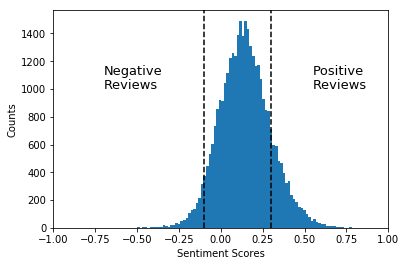

In [78]:
# histogram of sentiment scores with positive and negative review thresholds
plt.hist(df2.combined_nltk, bins=100)
plt.axvline(x=-0.1, color="k",linestyle="dashed")
plt.axvline(x=0.3, color="k",linestyle="dashed")

plt.text(0.55, 1100, "Positive", fontsize=13)
plt.text(0.55, 1000, "Reviews", fontsize=13)
plt.text(-0.7, 1100, "Negative", fontsize=13)
plt.text(-0.7, 1000, "Reviews", fontsize=13)
plt.xlim(-1.0,1.0)
plt.xlabel("Sentiment Scores")
plt.ylabel("Counts")

plt.savefig("polarity_histogram.png", dpi=900);

In [80]:
pickle.dump(df2, open("df_polarity.pkl", "wb"))

In [ ]:
# load pickled gyms df
df2 = pickle.load(open("df_polarity.pkl", "rb"))

In [81]:
df2.text[1000]

'Gotta love a small, absurdly affordable community gym. They have yoga on Monday and Wednesday nights, and on Saturday mornings. They also have boxing cardio (think boot camp), kickboxing, spin, etc., plus the whole range of free weights and machines. The staff is nice and helpful. \n\nKeep in mind the "community" and "absurdly affordable" parts. This isn\'t lifetime fitness. But it is a great place to work out for $99 a YEAR. Closed on Sundays, and short hours on Saturdays (10:00am-1:00pm maybe?). \n\nOverall, give it a try. It\'s $3 to drop in and work out or take a class. I\'ve been coming for years and I love it here.'

In [82]:
# example of positive review# exampl 
print("Sentiment score: {}".format(df2.combined_nltk[1000]))
print("Review: {}".format(df2.text[1000]))

Sentiment score: 0.145
Review: Gotta love a small, absurdly affordable community gym. They have yoga on Monday and Wednesday nights, and on Saturday mornings. They also have boxing cardio (think boot camp), kickboxing, spin, etc., plus the whole range of free weights and machines. The staff is nice and helpful. 

Keep in mind the "community" and "absurdly affordable" parts. This isn't lifetime fitness. But it is a great place to work out for $99 a YEAR. Closed on Sundays, and short hours on Saturdays (10:00am-1:00pm maybe?). 

Overall, give it a try. It's $3 to drop in and work out or take a class. I've been coming for years and I love it here.


In [84]:
# example of positive review# exampl 
print("Sentiment score: {}".format(df2.combined_nltk[1100]))
print("Review: {}".format(df2.text[1100]))

Sentiment score: 0.245
Review: This is an awesome place to reach your goals.  Whether training for an ironman race or just want to get in shape this is the place.
Kyle and his team are very attentive and help you reach your goals.
My strength has grown and at the age of 61 really helps in my goals.
Go check it out. It is also a very friendly environment which makes the workout go fast.


In [85]:
# example of positive review# exampl 
print("Sentiment score: {}".format(df2.combined_nltk[1110]))
print("Review: {}".format(df2.text[1110]))

Sentiment score: 0.158
Review: Looks like this gym has been bought out again. Originally  came here because it was cleaner and the equipment was pretty well-kept up. This morning came in to take a group fitness class and a number of the women commented how filthy the floor was and that it did not look like it had been cleaned At least in the last week and perhaps longer. The classes here are pretty good which is why I use this gym but if it continues to deteriorate I will go up the street to 24 hour fitness.


In [86]:
df2[["combined_nltk", "pos_nltk", "neg_nltk", "neu_nltk", "compound_nltk"]].describe()

,combined_nltk,pos_nltk,neg_nltk,neu_nltk,compound_nltk
count,33899.000000,33899.000000,33899.000000,33899.000000,33899.000000
mean,0.145470,0.196797,0.051326,0.751877,0.618267
std,0.154104,0.118187,0.056212,0.102508,0.602730
min,-0.623000,0.000000,0.000000,0.096000,-0.999100
25%,0.042000,0.110000,0.000000,0.697000,0.624900
50%,0.140000,0.179000,0.038000,0.767000,0.926000
75%,0.241000,0.266000,0.076000,0.823000,0.974800
max,0.904000,0.904000,0.623000,1.000000,0.999700


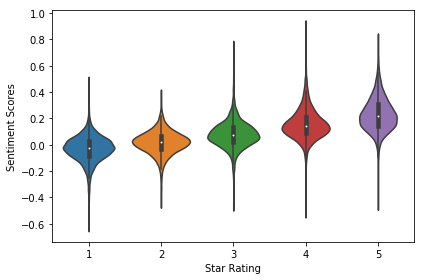

In [88]:
# violin plot of star rating and sentiment scores
sns.violinplot(x=df2.stars_y, y=df2.combined_nltk)
plt.xlabel("Star Rating")
plt.ylabel("Sentiment Scores")
plt.tight_layout();

plt.savefig("sentiment_rating_violinplot.png", dpi=900);

In [91]:
df2["positive_negative"] = ['Positive' if polarity > 0.3 else 'Negative' if polarity < -0.2 else np.nan for polarity in df2.combined_nltk]
df2[["positive_negative", "stars_y"]].groupby("positive_negative").describe()

stars_y                                             
                    count      mean       std  min  25%  50%  75%  max
positive_negative                                                     
Negative            334.0  1.299401  0.790446  1.0  1.0  1.0  1.0  5.0
Positive           5125.0  4.856780  0.397807  1.0  5.0  5.0  5.0  5.0

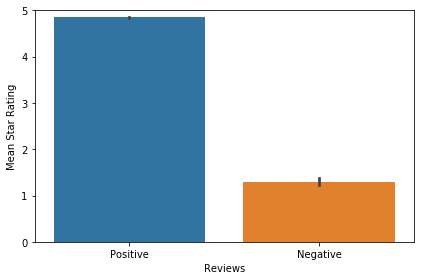

In [92]:
# bar plot of positive and negative reviews and mean star rating# bar pl 
sns.barplot(x=df2.positive_negative, y=df2.stars_y)
plt.xlabel("Reviews")
plt.ylabel("Mean Star Rating")
plt.ylim(0,5)
plt.tight_layout()

plt.savefig("reviews_rating_barplot.png", dpi=900);

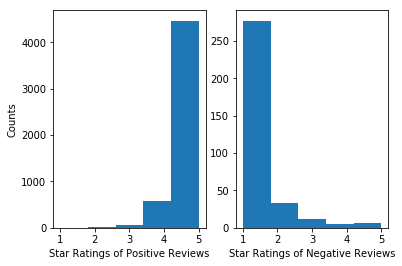

In [93]:

# histogram of star ratings of positive and negative reviews# histog 
positive_stars = df2[df2.positive_negative=="Positive"].stars_y
negative_stars = df2[df2.positive_negative=="Negative"].stars_y

plt.subplot(1,2,1)
plt.hist(positive_stars, bins=5)
plt.xlabel("Star Ratings of Positive Reviews")
plt.ylabel("Counts")

plt.subplot(1,2,2)
plt.hist(negative_stars, bins=5)
plt.xlabel("Star Ratings of Negative Reviews")

plt.savefig("positive_negative_stars_histograms.png", dpi=900);

In [94]:
df2.positive_negative.value_counts()


Positive    5125
Negative     334
Name: positive_negative, dtype: int64

#### Further topic analysis, this time with NMF 

In [107]:
len(positive_reviews)

5125

In [162]:
pos_revs = []
for sublist in positive_reviews:
    pos_revs.append(' '.join(sublist))

In [150]:
" ".join(positive_reviews[20])

'tucked away main road overall great gym brianna great orientation made sure basic safety great price lot space boulder adding auto belay wall too lived closer would get membership great price'

In [163]:
pos_rev

'going fitness world since opened great experience love personal training studio lot people looking feeling judged personal bathroom shower always clean studio provides free bottled water clean towel trainer good friendly customer best club toronto love easy fun workout curve call girl time u girl go around circuit talking gabbing sharing laughing zumbaim warned im really going love workout nice great gym feel posh awesome class instructor much better others thats life he best trainer vegasis great older client shawn absolutely great dedicated trainer take time really making sure feel comfortable great workout every time looking best knowledgeable trainer vega go shawn training shawn amazing shawn easy going fun personality make session enjoyable even though busting butt truly care reaching fitness goal dedicated helping get there without ever shaming making feel guilty impressed shawn glad found him train disappointed gym great hand training clean professional environment equipment to

In [135]:
import itertools
pos_revs = list(itertools.chain.from_iterable(positive_reviews))

In [164]:
pos_revs[20]

'tucked away main road overall great gym brianna great orientation made sure basic safety great price lot space boulder adding auto belay wall too lived closer would get membership great price'

In [122]:
for element in positive_review:
    

['great',
 'time',
 'today',
 'ownermanger',
 'great',
 'knowledgable',
 'friendly',
 'clean',
 'gym']

In [167]:
pos_revs[1]

'best club toronto love easy fun workout curve call girl time u girl go around circuit talking gabbing sharing laughing zumbaim warned im really going love workout nice'

In [168]:
# vectorize bag positive reviews using tfidf
tfidf = TfidfVectorizer(min_df=0.0001)
X_positive = tfidf.fit_transform(pos_revs)
positive_word_list = tfidf.get_feature_names()
len(positive_word_list)

8423

In [169]:
# positive review
print("Sentiment score: {}".format(df2.combined_nltk[1059]))
print("Review: {}".format(df2.text[1059]))

Sentiment score: 0.42
Review: LOVE THIS PLACE!  Great equipment and atmosphere, Iv'e been to many gyms and this is by far my favorite place.


In [177]:
# positive review
print("Sentiment score: {}".format(df2.combined_nltk[1798]))
print("Review: {}".format(df2.text[1798]))

Sentiment score: 0.51
Review: Awesome place to workout .friendly staff and worldclass trainers


#### Latent Topics within positive reviews

In [178]:
X_positive.shape

(5125, 8423)

Dimension reduction with NMF

In [179]:

# identify latent topics using non-negative matrix factorization (NMF)# identi 
nmf = NMF(n_components=6, random_state=111, alpha=.1, l1_ratio=.5, init='nndsvd')
X_positive_reduced = nmf.fit_transform(X_positive)
components = nmf.components_
print(components)

[[0.         0.01047973 0.00805835 ... 0.         0.         0.        ]
 [0.         0.05513691 0.         ... 0.         0.         0.        ]
 [0.         0.01281369 0.         ... 0.         0.         0.        ]
 [0.         0.01353182 0.01193042 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Taking a look at top words within each topic

In [180]:
for index,values in enumerate(components):
    print("topic {}".format(index))
    temp = list(zip(positive_word_list, components[index]))
    print(sorted(temp, key=lambda x: x[1], reverse=True)[:20],"\n")

topic 0
[('great', 2.3655188517823387), ('workout', 2.044879524476791), ('place', 1.5490652835544456), ('get', 0.8659227646836009), ('trainer', 0.8454766937084843), ('awesome', 0.7814540344176046), ('recommend', 0.7571321968755568), ('coach', 0.7325645955810137), ('people', 0.697785029203596), ('work', 0.6921288255517651), ('amazing', 0.6814162163816658), ('fun', 0.6454295364535299), ('highly', 0.6290381617872316), ('time', 0.5850787692635595), ('everyone', 0.5068265725138558), ('make', 0.4944127141962069), ('crossfit', 0.4661832806490241), ('out', 0.46259715659587164), ('feel', 0.4442866479017243), ('atmosphere', 0.4427689166081338)] 

topic 1
[('gym', 2.091447800720016), ('clean', 2.020088814672395), ('staff', 1.9572341126000536), ('friendly', 1.7632331609847551), ('equipment', 1.4260044207924176), ('nice', 1.298281756293499), ('great', 1.0344408544698083), ('always', 0.8919321526927734), ('facility', 0.826504997696077), ('helpful', 0.7135406401716216), ('super', 0.6062386172971154),

#### Negative Reviews 

In [170]:
# collect negative sentiment reviews together
negative_reviews = [doc_review[index] for index,polarity in enumerate(df2.combined_nltk) if polarity < -0.2]
len(negative_reviews)

334

In [182]:
neg_revs = []
for sublist in negative_reviews:
    neg_revs.append(' '.join(sublist))

In [176]:
# positive review
print("Sentiment score: {}".format(df2.combined_nltk[1111]))
print("Review: {}".format(df2.text[1111]))

Sentiment score: -0.207
Review: My boyfriend and I cancelled our membership after 3years today. I was told we couldn't use all the equipment that was on the floor. The equipment was always available, but recently, they moved some behind a fenced area. The fenced area is for members that pay for trainers. I'm upset that your services are getting worse, not better. There are gyms everywhere, since you don't offer me a benefit to stay, I'll try one of them!


Latent Topics within positive reviews

In [183]:
tfidf = TfidfVectorizer(min_df=0.005)
X = tfidf.fit_transform(neg_revs)
negative_word_list = tfidf.get_feature_names()
len(negative_word_list)

962

In [184]:
nmf = NMF(n_components=6, random_state=111, alpha=.1, l1_ratio=.5, init='nndsvd')
X_negative_reduced = nmf.fit_transform(X)
components = nmf.components_
print(components)

[[0.00912911 0.         0.         ... 0.         0.         0.        ]
 [0.02172997 0.00393067 0.         ... 0.         0.02746238 0.        ]
 [0.0036288  0.         0.         ... 0.         0.04911452 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [185]:
for index,values in enumerate(components):
    print("topic {}".format(index))
    temp = list(zip(negative_word_list, components[index]))
    print(sorted(temp, key=lambda x: x[1], reverse=True)[:20],"\n")

topic 0
[('always', 0.6664088626007929), ('broken', 0.6308996152308295), ('machine', 0.5410304083749965), ('equipment', 0.5002639004432683), ('dirty', 0.4822803678237036), ('room', 0.26255795893360145), ('locker', 0.24898559201392656), ('disgusting', 0.22174568702500716), ('one', 0.1964220660118716), ('pool', 0.1726242327263826), ('old', 0.16472470672946948), ('staff', 0.1489893271178625), ('weight', 0.1362302595899233), ('poor', 0.1358224053658308), ('im', 0.12088023129341742), ('lot', 0.12055106056295439), ('worth', 0.1198573985609321), ('use', 0.11669300921126553), ('work', 0.1145589835860046), ('gym', 0.11017890640678828)] 

topic 1
[('horrible', 0.5872928297364212), ('membership', 0.5785841103369753), ('cancel', 0.5511001044837194), ('service', 0.502662190522961), ('month', 0.421167721217611), ('customer', 0.3884522456551929), ('money', 0.2805559219035288), ('contract', 0.2697178942771712), ('told', 0.2416018083782489), ('even', 0.22862500846134562), ('place', 0.22295902984231636)